In [2]:
%matplotlib inline

import itertools
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sb
import tensorflow as tf
from tqdm import tqdm_notebook as tqdm

from collections import namedtuple, defaultdict, Counter
import csv
from glob import glob
import json
import pickle
import random
import re
import sys

np.set_printoptions(suppress=True, precision=2, threshold=20)

In [3]:
results = pd.DataFrame()
for path in glob("../../data/experiments/synthetic-parameter-analysis/results*.csv"):
    results = pd.concat([results, pd.read_csv(path)], sort=False)
    
print("Viralities:", sorted(results.virality_exp.unique()))

vir2text = {2: "Very high", 4: "High", 8: "Low", 32: "Very low"}

results['Virality'] = results.virality_exp.apply(vir2text.get)
results.dropna(subset = ['Virality'], inplace=True)

results["Propagation"] = results.infl_strength.apply(
    lambda n: "By interests" if np.isnan(n) else "By influence" if n == 1. else np.nan
)

results["Activation"] = results.single_activator.apply(
    lambda s: "Endogenous" if s else "Exogenous"
)

for x, x_name in [
    ("mean_node_per_item", "Cascade size"),
    ("mean_max_time", "Cascade depth")
]:
    plt.tight_layout()
    sb.set_context("paper", font_scale=1.0)
    g = sb.FacetGrid(results, col="Activation",  row="Propagation", 
                     hue='Virality', margin_titles=True, legend_out=True)
    g.map(sb.lineplot, "homophily", x).add_legend(
        ).set_axis_labels("Homophily", x_name
        ).set_titles("{col_name}")
    plt.savefig(f"../../data/experiments/plots/synth-{x}.pdf")
    plt.show()

AttributeError: 'DataFrame' object has no attribute 'virality_exp'

Viralities: [1, 4, 16, 64, 256, 1024, 4096, 16384, 65536, 262144, 1048576, 4194304, 16777216]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


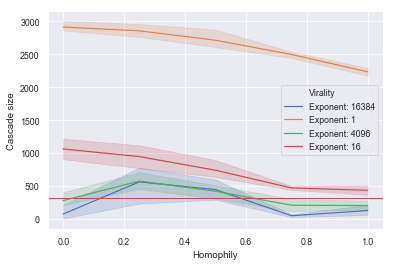

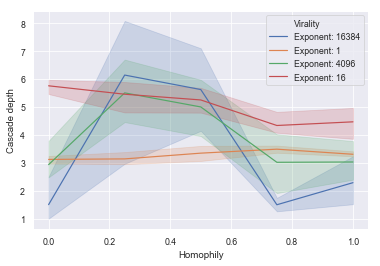

In [197]:
results = pd.read_csv(
    "../../data/experiments/real-data-comparison/"
    "digg-by-interest-results.csv")

assert len(results.infl_strength.unique()) == 1
assert len(results.single_activator.unique()) == 1

print("Viralities:", sorted(results.virality_exp.unique()))

vir2text = {k: "Exponent: " + str(k) for k in [1, 16, 32, 4096, 16384]}

results['Virality'] = results.virality_exp.apply(vir2text.get)
results.dropna(subset = ['Virality'], inplace=True)

results["Propagation"] = results.infl_strength.apply(
    lambda n: "By interests" if np.isnan(n) else "By influence" if n == 1. else np.nan
)

results["Activation"] = results.single_activator.apply(
    lambda s: "Endogenous" if s else "Exogenous"
)

for x, x_name in [
    ("mean_node_per_item", "Cascade size"),
    ("mean_max_time", "Cascade depth")
]:
    plt.tight_layout()
    sb.set_context("paper", font_scale=1.0)
    sb.lineplot(data=results,
                x="homophily",
                y=x,
                hue='Virality'
    )
    if x_name == 'Cascade size':
        plt.axhline(y=315, linewidth=1, color='r')
    plt.xlabel("Homophily")
    plt.ylabel(x_name)
    plt.savefig(f"../../data/experiments/plots/digg-{x}.pdf")
    plt.show()

In [198]:
results.reset_index()
# choosing all the rows with mean_node_per_item near 315: row 3, 56, 

,index,single_activator,infl_strength,homophily,virality_exp,seed,mean_item_per_node,mean_node_per_item,mean_max_time,item_per_node,node_per_item,time_per_item,Virality,Propagation,Activation
0,0,False,NaN,0.00,16384,0,1.989362,280.500000,3.000000,[2 2 2 ... 2 2 2],[1113 1125 1 1 1 1 1 1],[9 9 1 1 1 1 1 1],Exponent: 16384,By interests,Exogenous
1,0,False,NaN,0.00,1,0,2875.643021,2867.408076,3.168671,[3361 3361 3361 ... 2380 2363 2393],[3352 48 2301 ... 1994 3482 3482],[4 1 6 ... 6 1 1],Exponent: 1,By interests,Exogenous
2,0,False,NaN,0.00,1,1,2879.951752,2876.647160,3.134825,[3412 3412 3412 ... 2333 2421 2414],[3482 2018 3482 ... 2763 3482 1586],[ 1 10 1 ... 5 1 7],Exponent: 1,By interests,Exogenous
3,0,False,NaN,1.00,4096,0,77.621655,312.769608,4.137255,[ 96 96 96 96 96 96 96 96 96 96 96 ...,[ 16 640 6 656 6 677 1 6 6 640 6 ...,[1 8 1 7 1 7 1 1 1 9 1 1 1 1 8 1 1 1 1 8 1 1 7...,Exponent: 4096,By interests,Exogenous
4,0,False,NaN,0.25,1,0,2839.234922,2853.988453,2.977771,[3282 3282 3281 ... 2417 2410 2356],[3291 15 14 ... 1532 3482 3482],[4 1 1 ... 6 1 1],Exponent: 1,By interests,Exogenous
5,0,False,NaN,1.00,16384,0,31.050477,261.609195,3.793103,[35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 ...,[ 6 6 16 6 638 6 6 634 655 642 636 7...,[ 1 1 1 1 9 1 1 8 6 9 8 9 1 1 1 ...,Exponent: 16384,By interests,Exogenous
6,0,False,NaN,0.00,4096,1,17.025478,232.434783,2.554348,[18 18 18 ... 15 17 2],[1166 1155 6 1 6 1 1 2 16 ...,[ 9 9 1 1 1 1 1 1 1 1 9 8 1 1 1 ...,Exponent: 4096,By interests,Exogenous
7,0,False,NaN,0.50,1,0,2657.454911,2657.454911,3.265652,[3302 3302 3302 ... 2095 2127 2131],[2055 16 18 ... 1458 3482 3482],[6 1 1 ... 6 1 1],Exponent: 1,By interests,Exogenous
8,0,False,NaN,0.00,16384,1,7.555556,3.238095,1.000000,[11 10 2 10 9 9 10 1 6],[6 5 3 1 1 1 3 1 6 1 1 1 5 2 6 6 1 1 6 5 6],[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1],Exponent: 16384,By interests,Exogenous
9,0,False,NaN,0.75,1,0,2538.757036,2546.802651,3.330452,[3247 3248 3247 ... 2000 2014 2021],[1863 12 18 ... 1235 3482 3482],[6 1 1 ... 7 1 1],Exponent: 1,By interests,Exogenous


In [201]:
def histogram(idx):
    series = results.iloc[idx]['item_per_node']
    series = series.replace('[','').replace(']','')
    vec = [int(_) for _ in series.split()]
    
    print('Number of nodes ', len(vec))
    
    plt.tight_layout()
    sb.set_context("paper", font_scale=1.0)

    plt.hist(vec, bins=30, range=(0,100))

    plt.xlabel("Nodes")
    plt.ylabel('Items')

Number of nodes  822


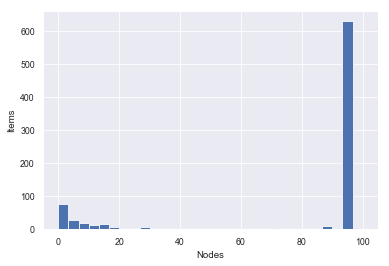

In [203]:
histogram(idx=3)

Number of nodes  834


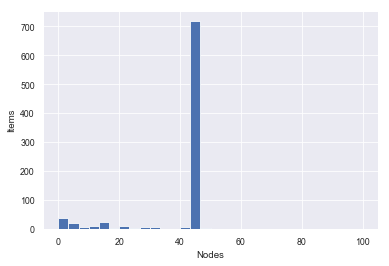

In [204]:
histogram(idx=56)